## PROJECT
### Communicate Data Findings on Prosper Loan Dataset 
### by Rasagnya
> The data analysis is on Prosper Loan dataset with 113937 rows and 81 columns. Now, 81 columns is a little too much information so let's visually decide what columns to consider and proceed with the analysis

> We see that there are quite a few columns with missing values. We will deal with those when we start analyzing the variables individually

## Univariate Analysis
### What are the different loan categories that are available?

> The loan status mostly comprises of Current, Completed, ChargedOff and Defaulted, with Current having the most records

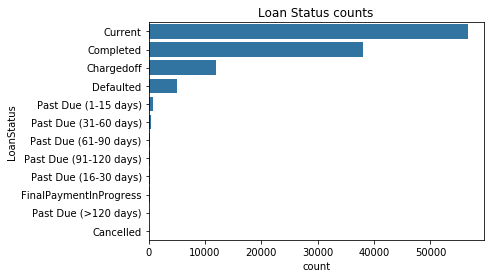

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
data = pd.read_csv('prosperLoanData.csv')
data.head()
cols = ['Term','LoanStatus','BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner','PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'AvailableBankcardCredit', 'TotalTrades',
       'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable',
       'StatedMonthlyIncome', 'TotalProsperLoans',
       'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding', 'LoanNumber', 'LoanOriginalAmount',
       'LoanOriginationDate',
       'MonthlyLoanPayment']
df = data[cols]
df.head()
base_color = sb.color_palette()[0]
Loan_order = df['LoanStatus'].value_counts().index
plot1 = sb.countplot(data = data, y = 'LoanStatus', color = base_color, order = Loan_order);
plt.title('Loan Status counts');
plt.show(plot1)

### What are the top 10 occupations of loan applicants?

> The occupations of loan applicants is topped by professional followed by computer programmer, executive, teacher etc

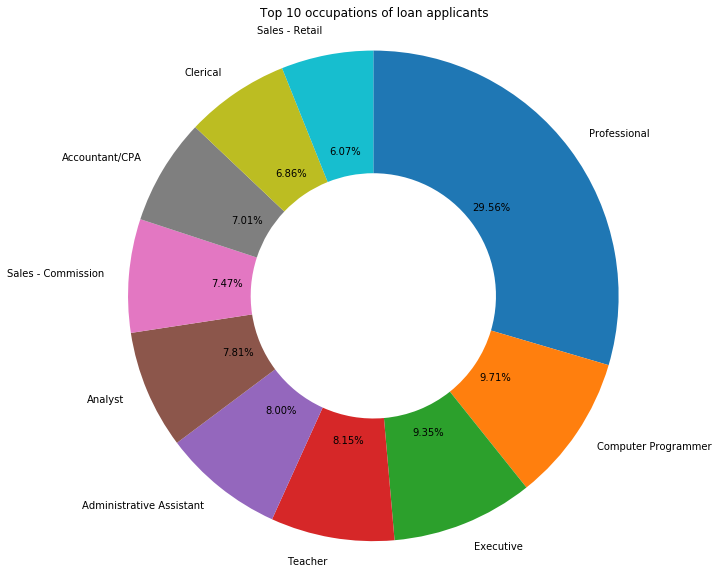

In [3]:
df1 = df[df['Occupation']!='Other']
sorted_counts = df1['Occupation'].value_counts().nlargest(10) 

plt.figure(figsize = [20, 10])
plot2 = plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.5}, autopct = '%.2f%%');
plt.axis('square')
plt.title("Top 10 occupations of loan applicants")
plt.show(plot2)


#### Univariate Analysis Insights

> BorrowerAPR tends to have slightly normal distribution although not entirely.

> Monthly loan payment varies from 0 to 2000, with a right tailed distribution. 

> Original Loan Amount also has a slight uneven distribution.

> Term is divided in to 3 categories - 12 month, 36 months and 60 months

> Even though the loan applicants do not have their own home they're still being granted loans probably because of their monthly income and that they have a source of income to repay the loan


## Bivariate Analysis
### How is Monthly Payment and Employment Status affected by term?

> Most of the loans have been taken for a 36 month term followed by 60 month term when looked across all the employment statuses and ProsperRating, with a zero to no little loans on 12 month term, which is expected because it's too soon to repay.

> Monthly payment also seems to have the same effect with respect to term, with a flat curve for 12 months and a more wider one for the rest


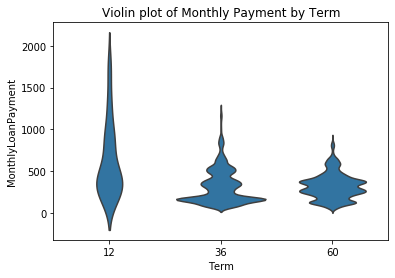

In [4]:
CurrentLoans = df[df['LoanStatus']=='Current']
base_color = sb.color_palette()[0]
plot3 = sb.violinplot(data = CurrentLoans, y = 'MonthlyLoanPayment', x = 'Term', color = base_color,
              inner = None);
plt.title('Violin plot of Monthly Payment by Term')
plt.show(plot3)


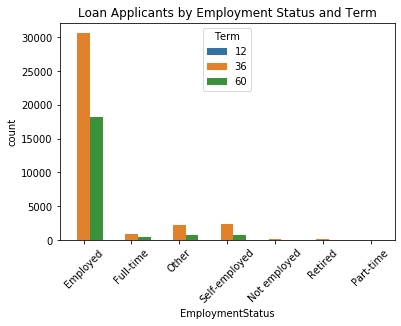

In [5]:
plot4 = sb.countplot(data = CurrentLoans, x = 'EmploymentStatus', hue = 'Term');
plt.xticks(rotation = 45)
plt.title('Loan Applicants by Employment Status and Term')
plt.show(plot4)

#### Bivariate Analysis Insights

> All the analysis has been done on only curret loans as thats the category with most loans in it.

> Debt to income ratio with monthly payment tells us that it's higher when the payment is less. It's better to pay in lesser installments and do it over a large period of time than to pay huge amounts and miss a few payments

## Multivariate Analysis
### How are some of the features correlated?

> BorrowerAPR is positively correlated with DebtToIncome Ratio and MonthlyLoanPayment with LoanOriginalAmount. However, BorrowerAPR is negatively correlated with StatedMonthlyIncome

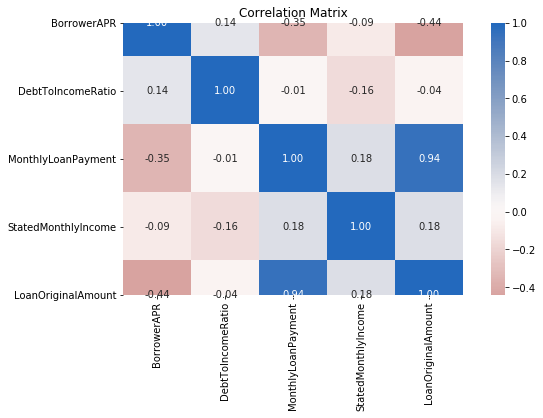

In [6]:
cols = ['BorrowerAPR', 'DebtToIncomeRatio', 'MonthlyLoanPayment','StatedMonthlyIncome', 'LoanOriginalAmount']
df = CurrentLoans[cols]
plt.figure(figsize = [10, 5])
plot5 = sb.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0, square = True)
plt.title('Correlation Matrix')
plt.show(plot5)


###### Conclusion
> If it is a repeated applicant, then the bank can check for their monthly loan payment and borrower APR and debt to income ratio to grant another loan

> If it is a new applicant, employment status, statedincome and borrowerAPR can help us decide in granting a loan to a potential customer

In [ ]:
! jupyter nbconvert Explanatory_DataAnalysis_Slides.ipynb --to slides --post serve --template output_toggle.tpl